In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score, RocCurveDisplay, confusion_matrix
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow import keras

In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\programdata\anaconda3\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [23]:
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings("ignore")

In [25]:
db = pd.read_csv("C:\\Users\\kodum\\Downloads\\Diabetes.zip")
db

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [27]:
db.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [29]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [31]:
db.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [35]:
db['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

In [37]:
print('Shape before removing Other values: ', db.shape)
db = db[db['gender'] != 'Other']
print('Shape after removing Other values: ', db.shape)

Shape before removing Other values:  (100000, 9)
Shape after removing Other values:  (99982, 9)


In [39]:
db['gender'].value_counts()

gender
Female    58552
Male      41430
Name: count, dtype: int64

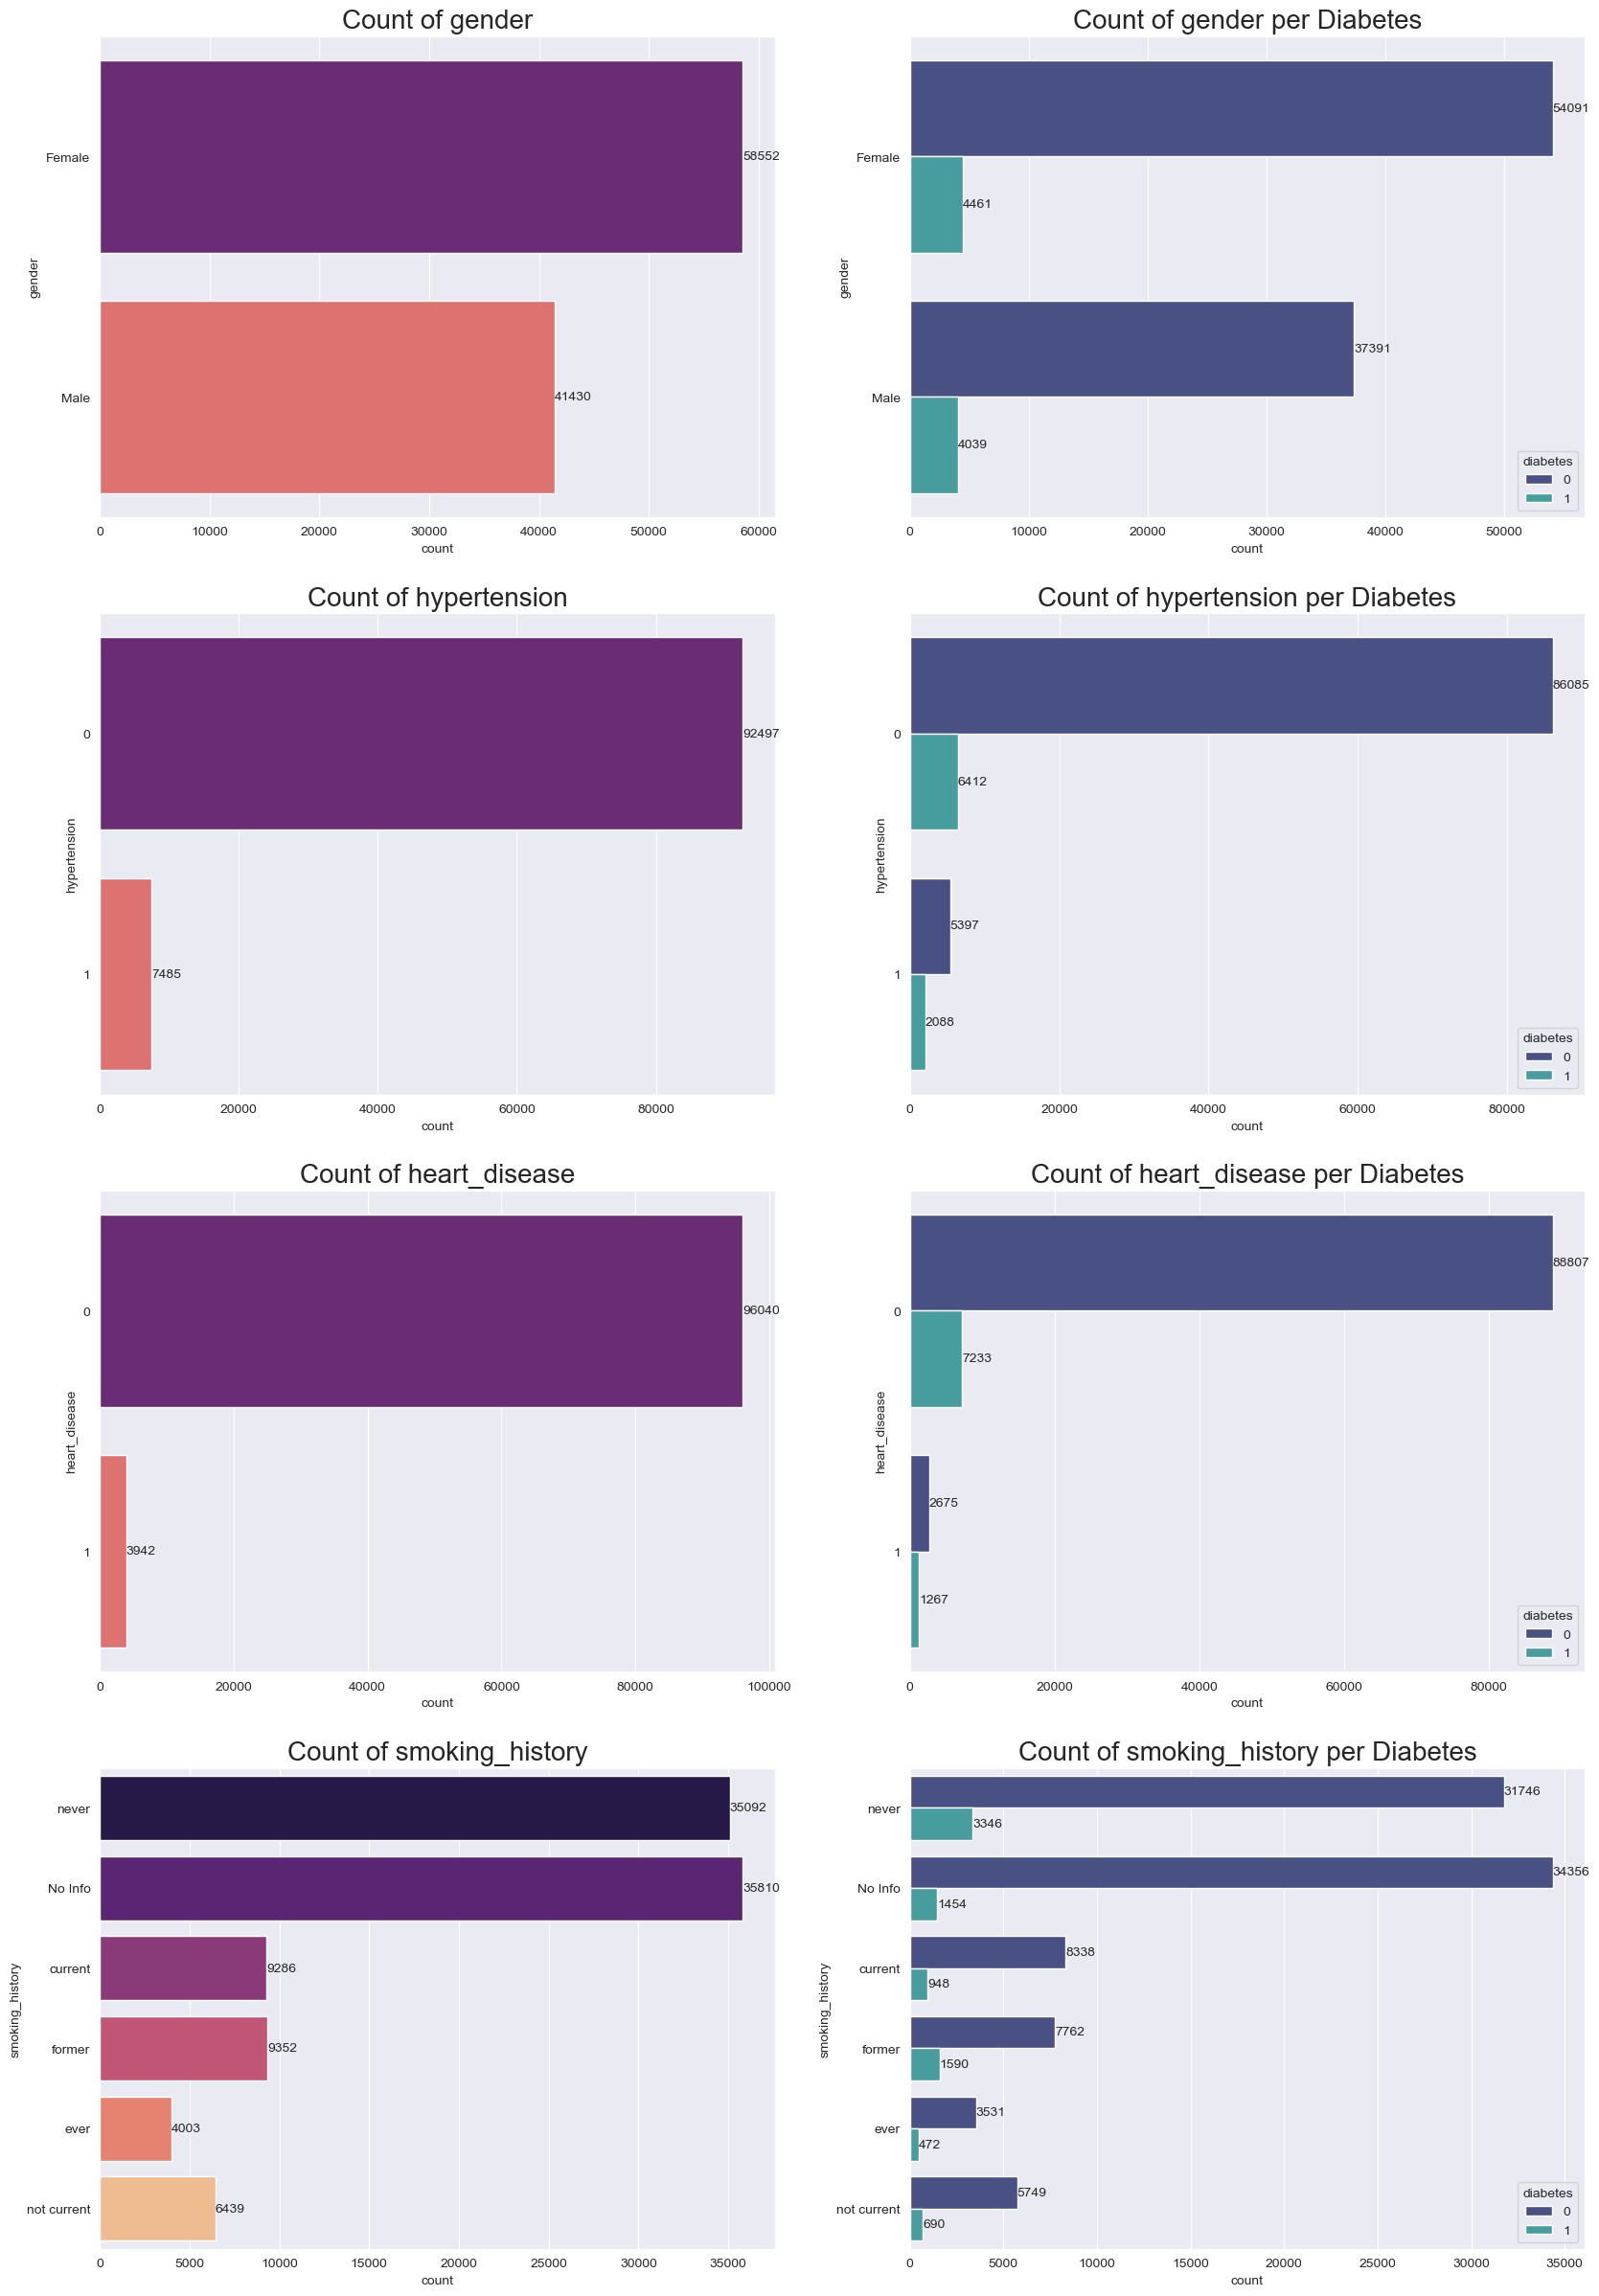

In [45]:
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'smoking_history']
fig, axes = plt.subplots(4,2, figsize=(20,30))
sns.set_style('darkgrid')
idx = 0
for col in categorical_columns:
    sns.countplot(data=db, y=col, palette='magma', orient='h',
                  ax=axes[idx][0]).set_title(f'Count of {col}', fontsize='20')
    for container in axes[idx][0].containers:
        axes[idx][0].bar_label(container)
    sns.countplot(data=db, y=col, palette='mako', orient='h',  hue='diabetes',
                  ax=axes[idx][1]).set_title(f'Count of {col} per Diabetes', fontsize='20')
    for container in axes[idx][1].containers:
        axes[idx][1].bar_label(container)
    idx +=1
plt.show()

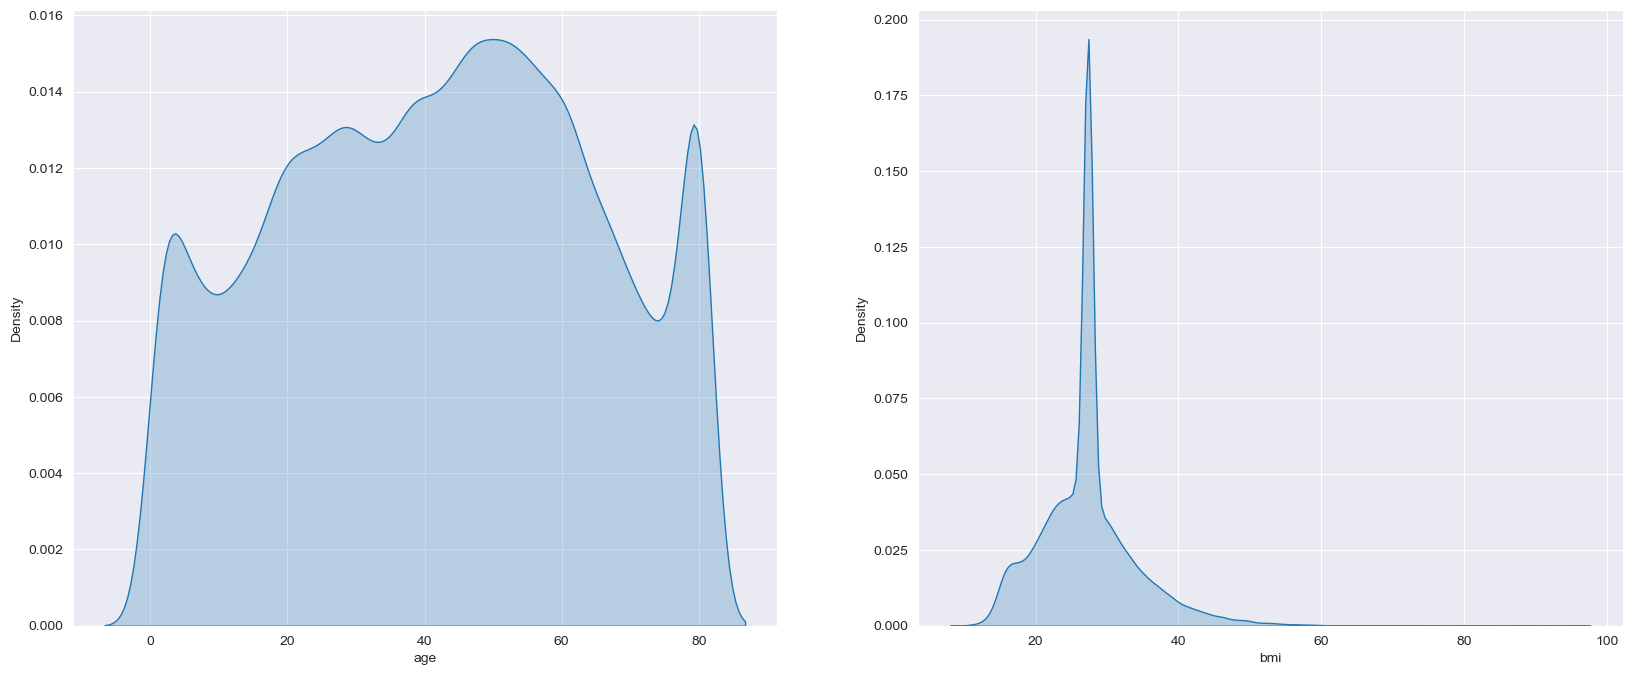

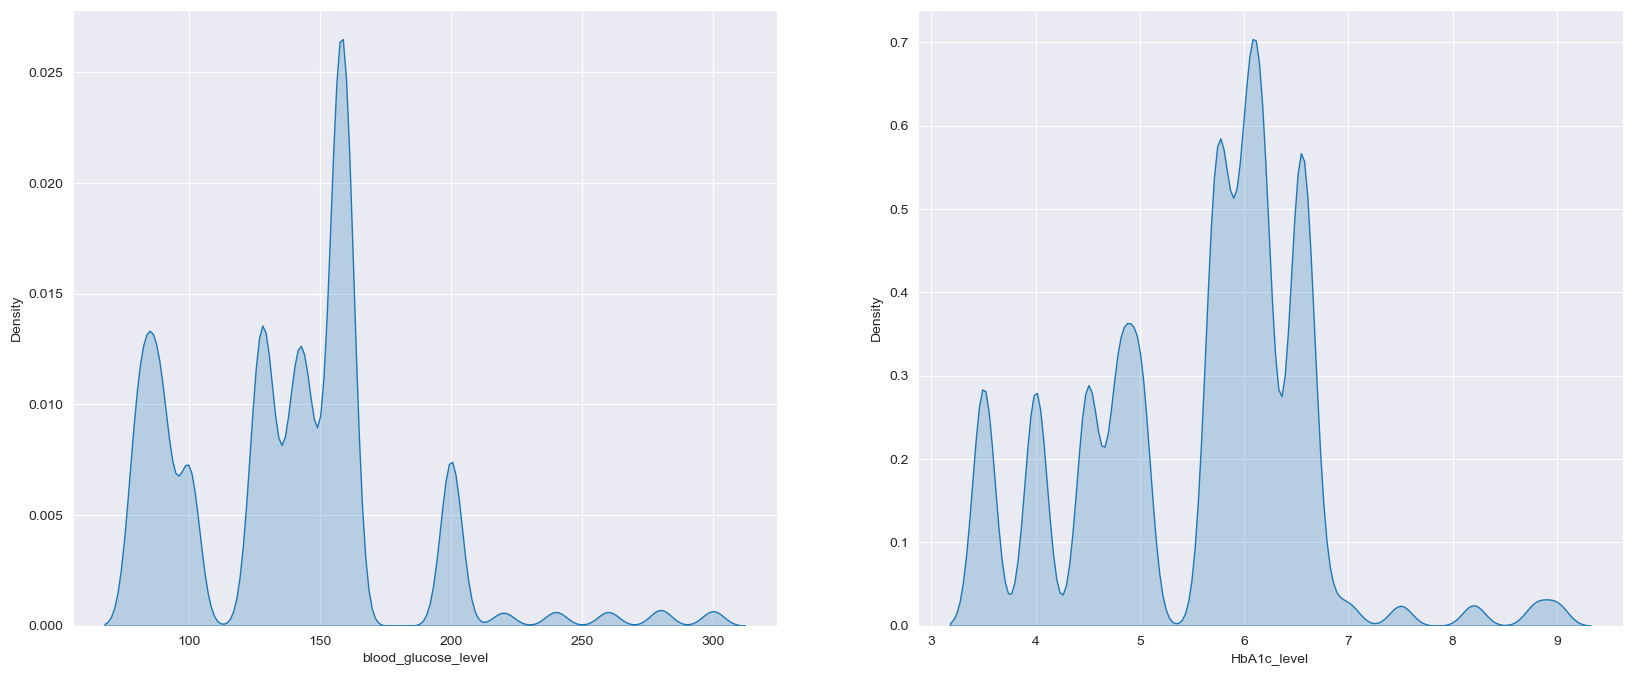

<Figure size 640x480 with 0 Axes>

In [43]:
numerical = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
i = 0

while i < 4:
  plt.figure(figsize=(20, 8))
  plt.subplot(1, 2, 1)
  sns.kdeplot(db[numerical[i]], fill=True)
  i += 1
  if i == 4:
    break
  plt.subplot(1, 2, 2)
  sns.kdeplot(db[numerical[i]], fill=True)
  i += 1

  plt.show()

plt.savefig('2')

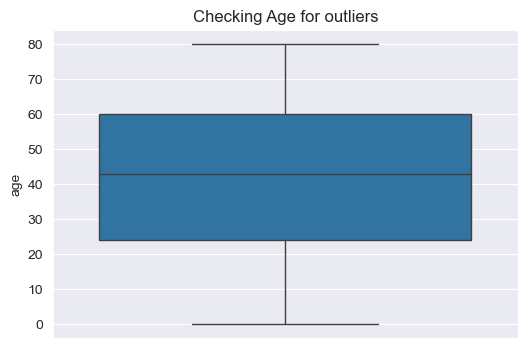

In [47]:
plt.figure(figsize=(6, 4))
plt.title('Checking Age for outliers')
sns.boxplot(db['age'])

plt.show()

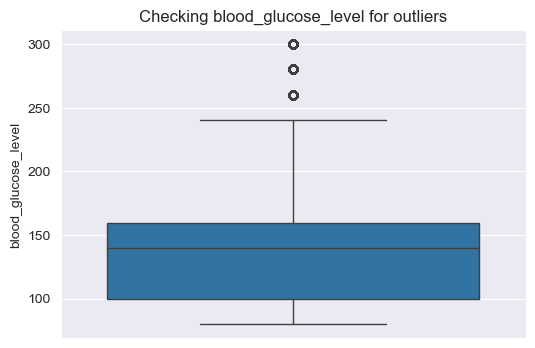

In [49]:
plt.figure(figsize=(6, 4))
plt.title('Checking blood_glucose_level for outliers')
sns.boxplot(db['blood_glucose_level'])

plt.show()

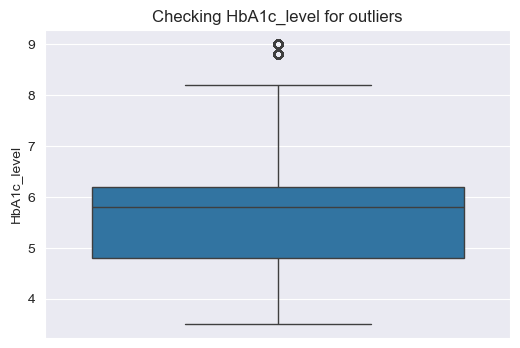

In [51]:
plt.figure(figsize=(6, 4))
plt.title('Checking HbA1c_level for outliers')
sns.boxplot(db['HbA1c_level'])

plt.show()

14.705
38.504999999999995


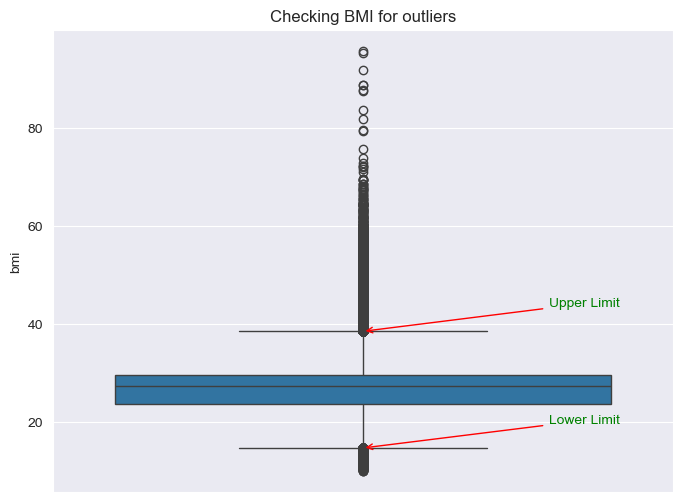

In [53]:
#CHECKING OUTLIERS FOR BMI
q1 = np.quantile(db['bmi'], 0.25)
q3 = np.quantile(db['bmi'], 0.75)
IQR = q3 - q1
lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
print(lower_limit)
print(upper_limit)

plt.figure(figsize=(8, 6))
plt.title('Checking BMI for outliers')
sns.boxplot(db['bmi'])

points_to_annotate = [(lower_limit, 'Lower Limit'), (upper_limit, "Upper Limit")]

for point, label in points_to_annotate:
    plt.annotate(
        label,
        xy=(0, point),
        xytext=(0.3, point+5),
        arrowprops=dict(arrowstyle='->', color='red'),
        fontsize=10, color='green'
    )

plt.show()

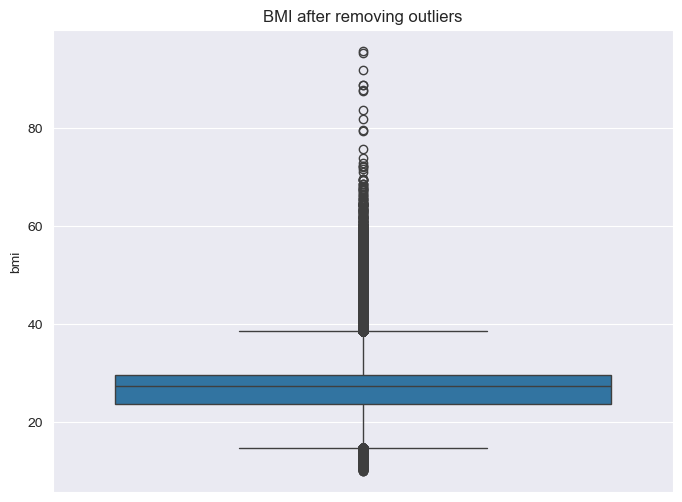

In [55]:
outliers = db[(db['bmi'] < lower_limit) | (db['bmi'] > upper_limit)]
data = db.drop(outliers.index)
plt.figure(figsize=(8, 6))
plt.title('BMI after removing outliers')
sns.boxplot(db['bmi'])
plt.show()

11.5
247.5


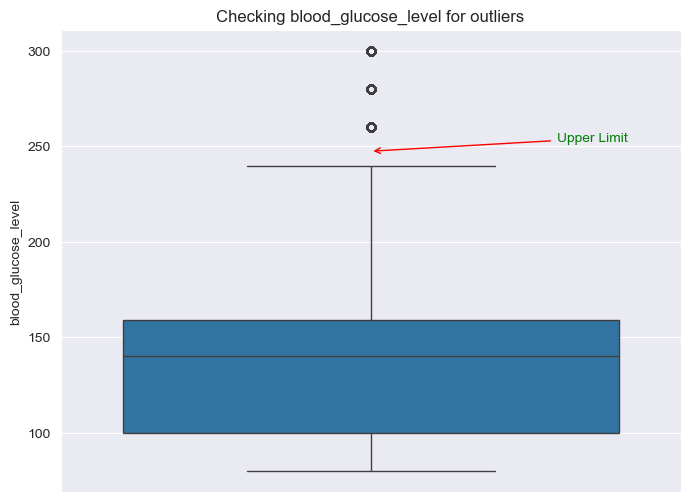

In [57]:
q1 = np.quantile(db['blood_glucose_level'], 0.25)
q3 = np.quantile(db['blood_glucose_level'], 0.75)
IQR = q3 - q1
lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
print(lower_limit)
print(upper_limit)

plt.figure(figsize=(8, 6))
plt.title('Checking blood_glucose_level for outliers')
sns.boxplot(db['blood_glucose_level'])

points_to_annotate = [(lower_limit, 'Lower Limit'), (upper_limit, "Upper Limit")]

for point, label in points_to_annotate:
    plt.annotate(
        label,
        xy=(0, point),
        xytext=(0.3, point+5),
        arrowprops=dict(arrowstyle='->', color='red'),
        fontsize=10, color='green'
    )

plt.show()

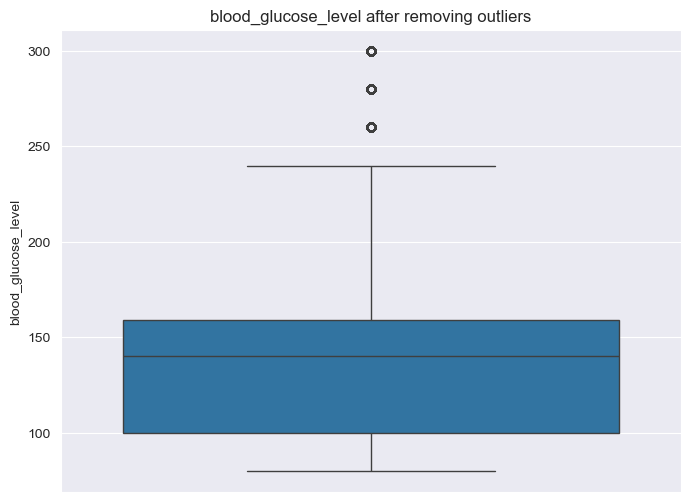

In [59]:
outliers = db[(db['blood_glucose_level'] < lower_limit) | (db['blood_glucose_level'] > upper_limit)]
data = db.drop(outliers.index)
plt.figure(figsize=(8, 6))
plt.title('blood_glucose_level after removing outliers')
sns.boxplot(db['blood_glucose_level'])
plt.show()

2.6999999999999993
8.3


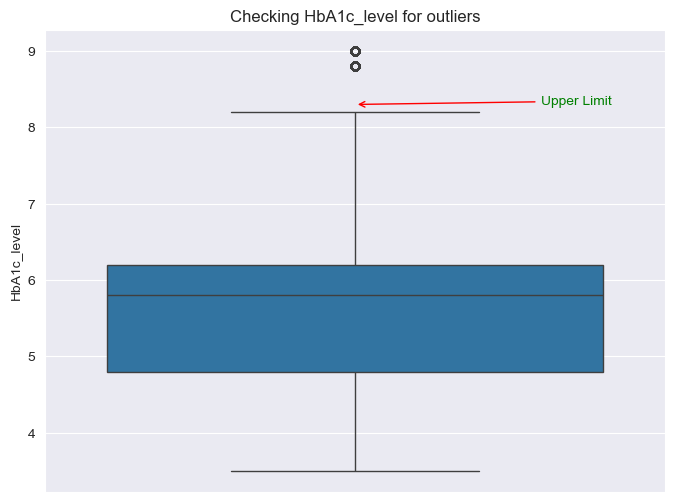

In [61]:
q1 = np.quantile(db['HbA1c_level'], 0.25)
q3 = np.quantile(db['HbA1c_level'], 0.75)
IQR = q3 - q1
lower_limit = q1 - (1.5 * IQR)
upper_limit = q3 + (1.5 * IQR)
print(lower_limit)
print(upper_limit)

plt.figure(figsize=(8, 6))
plt.title('Checking HbA1c_level for outliers')
sns.boxplot(db['HbA1c_level'])

points_to_annotate = [(lower_limit, 'Lower Limit'), (upper_limit, "Upper Limit")]

for point, label in points_to_annotate:
    plt.annotate(
        label,
        xy=(0, point),
        xytext=(0.3, point),
        arrowprops=dict(arrowstyle='->', color='red'),
        fontsize=10, color='green'
    )

plt.show()

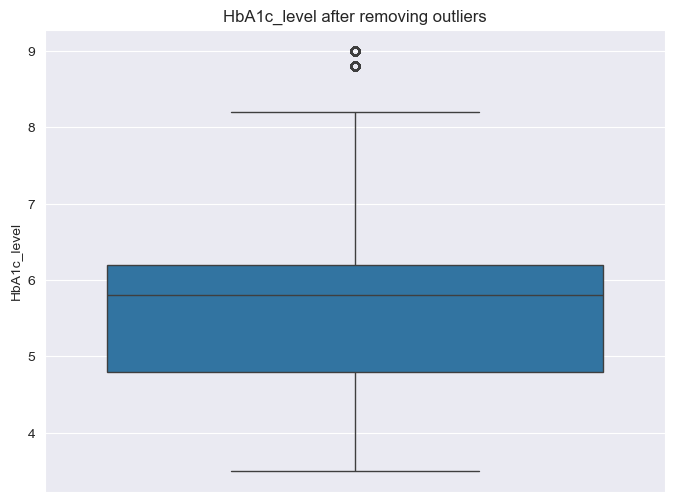

In [63]:
outliers = db[(db['HbA1c_level'] < lower_limit) | (db['HbA1c_level'] > upper_limit)]
data = db.drop(outliers.index)
plt.figure(figsize=(8, 6))
plt.title('HbA1c_level after removing outliers')
sns.boxplot(db['HbA1c_level'])
plt.show()

In [67]:
db.shape

(99982, 9)

In [69]:
db.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [71]:
db.duplicated().sum()

3854

In [73]:
db.drop_duplicates(inplace=True)

In [77]:
db.duplicated().sum()

0

In [79]:
bins = [0, 20, 40, 60, np.inf]
labels = ['0-20', '21-40', '41-60', 'upper_61']
db['age_group'] = pd.cut(db['age'], bins=bins, labels=labels, right=False)

           Total  Diabetes  Diabetes (%)
age_group                               
0-20       19025       106      0.557162
21-40      24658       603      2.445454
41-60      28470      2855     10.028100
upper_61   23975      4918     20.513034


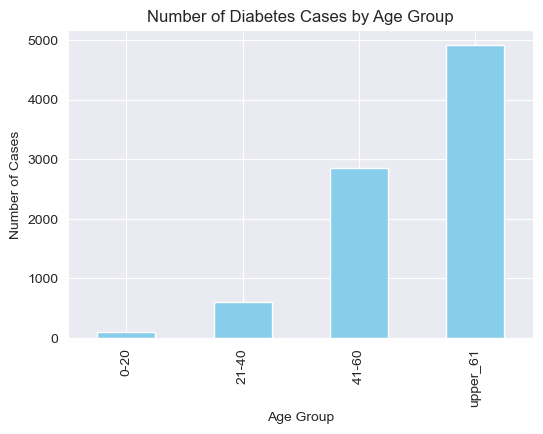

In [81]:
diabetes_by_age_group = db[db['diabetes'] == 1].groupby('age_group').size()

total_by_age_group = db.groupby('age_group').size()

result = pd.DataFrame({
    'Total': total_by_age_group,
    'Diabetes': diabetes_by_age_group
}).fillna(0)

result['Diabetes (%)'] = (result['Diabetes'] / result['Total']) * 100

print(result)

result['Diabetes'].plot(kind='bar', color='skyblue', figsize=(6, 4))
plt.title('Number of Diabetes Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.show()

In [83]:
db.drop(columns=['age'], axis=1, inplace=True)

In [85]:
db

,gender,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_group
0,Female,0,1,never,25.19,6.6,140,0,upper_61
1,Female,0,0,No Info,27.32,6.6,80,0,41-60
2,Male,0,0,never,27.32,5.7,158,0,21-40
3,Female,0,0,current,23.45,5.0,155,0,21-40
4,Male,1,1,current,20.14,4.8,155,0,upper_61
...,...,...,...,...,...,...,...,...,...
99994,Female,0,0,No Info,24.60,4.8,145,0,21-40
99996,Female,0,0,No Info,17.37,6.5,100,0,0-20
99997,Male,0,0,former,27.83,5.7,155,0,upper_61
99998,Female,0,0,never,35.42,4.0,100,0,21-40


In [103]:
categorical

,gender,smoking_history,age_group
0,Female,never,upper_61
1,Female,No Info,41-60
2,Male,never,21-40
3,Female,current,21-40
4,Male,current,upper_61
...,...,...,...
99994,Female,No Info,21-40
99996,Female,No Info,0-20
99997,Male,former,upper_61
99998,Female,never,21-40


In [105]:
categorical = categorical.apply(LabelEncoder().fit_transform)

In [107]:
categorical

,gender,smoking_history,age_group
0,0,4,3
1,0,0,2
2,1,4,1
3,0,1,1
4,1,1,3
...,...,...,...
99994,0,0,1
99996,0,0,0
99997,1,3,3
99998,0,4,1


In [109]:
newData = pd.concat([data, categorical], axis=1)
newData

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,gender,smoking_history,age_group
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0,0.0,4.0,3.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0,0.0,0.0,2.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0,1.0,4.0,1.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0,0.0,1.0,1.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
99523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,3.0
99663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,3.0
99706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0
99740,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,3.0


In [129]:
print(newData.dtypes)

gender                  object
age                    float64
hypertension           float64
heart_disease          float64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes               float64
gender                 float64
smoking_history        float64
age_group              float64
dtype: object


In [163]:
corr = newData.select_dtypes(include=['float64']).corr()

In [169]:
print(newData.columns)

Index(['age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi',
       'HbA1c_level', 'blood_glucose_level', 'diabetes', 'smoking_history',
       'age_group', 'gender_Female', 'gender_Male', 'gender_0.0',
       'gender_1.0'],
      dtype='object')


In [177]:
from sklearn.preprocessing import LabelEncoder
newData['gender'] = LabelEncoder().fit_transform(newData['gender'])

In [179]:
newData = pd.get_dummies(newData, columns=['gender'])
newData

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history,age_group,gender_Male,gender_0.0,gender_1.0,gender_Female_False,gender_Female_True,gender_0,gender_1
0,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0,4.0,3.0,False,True,False,False,True,False,True
1,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0,0.0,2.0,False,True,False,False,True,False,True
2,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0,4.0,1.0,True,False,True,True,False,True,False
3,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0,1.0,1.0,False,True,False,False,True,False,True
4,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0,1.0,3.0,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99523,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,1.0,3.0,False,True,False,True,False,True,False
99663,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.0,3.0,False,False,True,True,False,True,False
99706,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,1.0,2.0,False,False,True,True,False,True,False
99740,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,4.0,3.0,False,False,True,True,False,True,False


In [183]:
newData = newData.fillna(0)
newData

,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history,age_group,gender_Male,gender_0.0,gender_1.0,gender_Female_False,gender_Female_True,gender_0,gender_1
0,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0,4.0,3.0,False,True,False,False,True,False,True
1,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0,0.0,2.0,False,True,False,False,True,False,True
2,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0,4.0,1.0,True,False,True,True,False,True,False
3,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0,1.0,1.0,False,True,False,False,True,False,True
4,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0,1.0,3.0,True,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99523,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,1.0,3.0,False,True,False,True,False,True,False
99663,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,0.0,3.0,False,False,True,True,False,True,False
99706,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,1.0,2.0,False,False,True,True,False,True,False
99740,0.0,0.0,0.0,0,0.00,0.0,0.0,0.0,4.0,3.0,False,False,True,True,False,True,False


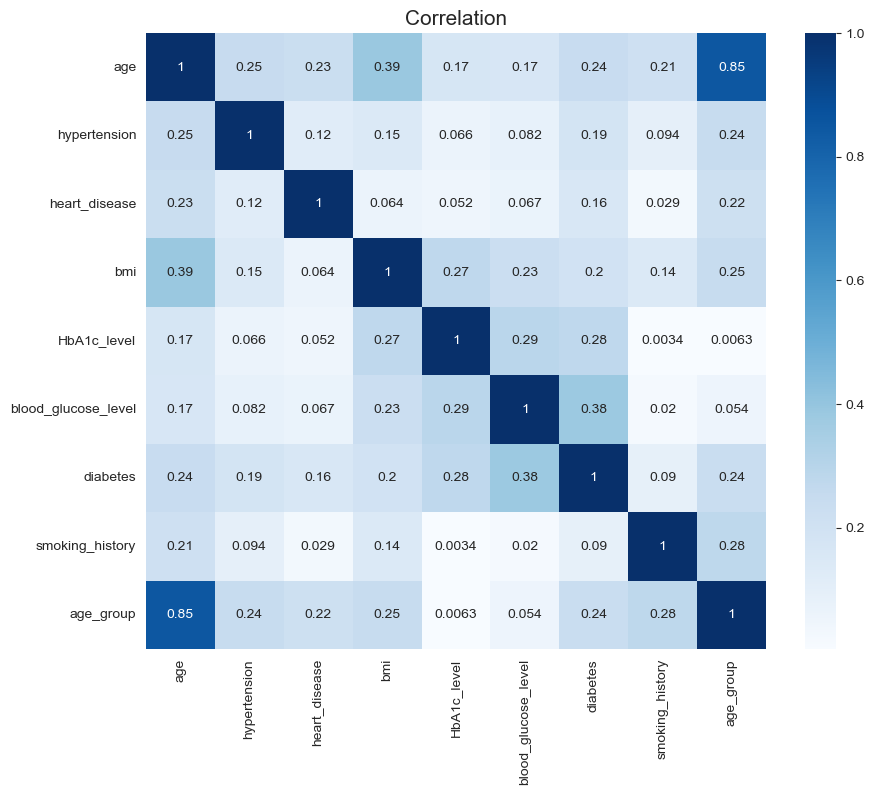

In [189]:
plt.figure(figsize=(10, 8))
plt.title('Correlation', fontsize=15)
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()